# 多腕バンディット（multi-armed bandit）

## 見せられないよ

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def multi_armed_bandit(select):
  click_rate=[0.1,0.6,0.8]
  
  r=[np.random.binomial(1,p) for p in click_rate]
  return int(r[select])


## 多腕バンディット（人手でチャレンジ）

In [44]:
total_reward=0
N=5
for i in range(N):
  print(i+1,"/",N,"回目")
  print("どの番号を選択しますか？(0 ～ 2)")
  selected=input()
  r=multi_armed_bandit(int(selected))
  print("ただいまの得点:",r)
  total_reward+=r
  print("合計得点:",total_reward)
  print("==========")

1 / 5 回目
どの番号を選択しますか？(0 ～ 2)
0
ただいまの得点: 1
合計得点: 1
2 / 5 回目
どの番号を選択しますか？(0 ～ 2)
1
ただいまの得点: 1
合計得点: 2
3 / 5 回目
どの番号を選択しますか？(0 ～ 2)
0
ただいまの得点: 0
合計得点: 2
4 / 5 回目
どの番号を選択しますか？(0 ～ 2)
1
ただいまの得点: 1
合計得点: 3
5 / 5 回目
どの番号を選択しますか？(0 ～ 2)


KeyboardInterrupt: ignored

# ランダムに選んだ場合



In [50]:
total_reward=0
N=5
for i in range(N):
  total_reward
  print(i+1,"/",N,"回目")
  selected=np.random.randint(0,3)
  print("どの番号を選択しますか？(0 ～ 2)=>",selected)
  r=multi_armed_bandit(int(selected))
  print("ただいまの得点:",r)
  total_reward+=r
  print("合計得点:",total_reward)
  print("==========")

1 / 5 回目
どの番号を選択しますか？(0 ～ 2)=> 2
ただいまの得点: 1
合計得点: 1
2 / 5 回目
どの番号を選択しますか？(0 ～ 2)=> 2
ただいまの得点: 1
合計得点: 2
3 / 5 回目
どの番号を選択しますか？(0 ～ 2)=> 0
ただいまの得点: 0
合計得点: 2
4 / 5 回目
どの番号を選択しますか？(0 ～ 2)=> 2
ただいまの得点: 1
合計得点: 3
5 / 5 回目
どの番号を選択しますか？(0 ～ 2)=> 1
ただいまの得点: 1
合計得点: 4


# 強化学習
過去の履歴（過去の行動, 過去の報酬）を使う

## 過去の履歴から期待値が最大の台を選択する

## $\epsilon$-greedy法：確率epsilonで期待値が最大の台を選択する

In [91]:
epsilon=0.0

def agent1(history,epsilon):  
  expectation=[0 for a in range(3)]
  counter=[0 for a in range(3)]
  for action,reward,_ in history:
    expectation[action]+=reward
    counter[action]+=1
  for a,r in enumerate(expectation):
    if counter[a]>0:
      expectation[a]=r/counter[a]
    else:
      expectation[a]=np.inf
  if np.random.random() > epsilon:
    return np.argmax(expectation)
  else:
    return np.random.randint(0,3)



history=[]
total_reward=0
N=10
for i in range(N):
  action=agent1(history,epsilon)
  r=multi_armed_bandit(int(action))
  print("%d 回目, action=%d, reward=%d"%(i,action,r))
  history.append((action,r,i))
  total_reward+=r
print("total=",total_reward)

0 回目, action=0, reward=0
1 回目, action=1, reward=1
2 回目, action=2, reward=1
3 回目, action=1, reward=1
4 回目, action=1, reward=1
5 回目, action=1, reward=0
6 回目, action=2, reward=1
7 回目, action=2, reward=1
8 回目, action=2, reward=0
9 回目, action=1, reward=0
total= 6


## 過去の履歴から期待値に応じた確率分布からサンプルして選択する

$$ p_i=\frac{\exp(expectation_i)}{\sum \exp(expectation_i) }$$

$i$番目のデザインを選択

In [70]:
def agent2(history):
  alpha=1.0
  expectation=[alpha for a in range(3)]
  counter=[0 for a in range(3)]
  for action,reward,_ in history:
    expectation[action]+=reward
    counter[action]+=1
  for a,r in enumerate(expectation):
    if counter[a]>0:
      expectation[a]=r/counter[a]
  p=(np.exp(expectation))/np.sum(np.exp(expectation))
  return np.random.choice(list(range(3)),1,p=p)[0]


history=[]    
total_reward=0
N=100
for i in range(N):
  action=agent2(history)
  r=multi_armed_bandit(int(action))
  print("%d 回目, action=%d, reward=%d"%(i,action,r))
  history.append((action,r,i))
  total_reward+=r
print("total=",total_reward)


0 回目, action=1, reward=1
1 回目, action=0, reward=0
2 回目, action=0, reward=0
3 回目, action=1, reward=1
4 回目, action=1, reward=1
5 回目, action=2, reward=1
6 回目, action=0, reward=0
7 回目, action=2, reward=1
8 回目, action=2, reward=1
9 回目, action=1, reward=1
10 回目, action=2, reward=0
11 回目, action=1, reward=1
12 回目, action=0, reward=0
13 回目, action=1, reward=0
14 回目, action=2, reward=0
15 回目, action=1, reward=1
16 回目, action=2, reward=1
17 回目, action=1, reward=1
18 回目, action=1, reward=1
19 回目, action=1, reward=0
20 回目, action=1, reward=1
21 回目, action=1, reward=1
22 回目, action=2, reward=0
23 回目, action=1, reward=1
24 回目, action=1, reward=1
25 回目, action=0, reward=0
26 回目, action=1, reward=0
27 回目, action=0, reward=0
28 回目, action=1, reward=0
29 回目, action=2, reward=1
30 回目, action=1, reward=1
31 回目, action=1, reward=0
32 回目, action=1, reward=1
33 回目, action=0, reward=0
34 回目, action=1, reward=1
35 回目, action=1, reward=1
36 回目, action=2, reward=1
37 回目, action=2, reward=1
38 回目, action=2, rewar

In [71]:

def agent3(history):
  ucb1=[0 for a in range(3)]
  counter=[0 for a in range(3)]
  for action,reward,_ in history:
    ucb1[action]+=reward
    counter[action]+=1
  if len(history)>0:
    t=history[-1][2]+1
  else:
    t=0
  for a,r in enumerate(ucb1):
    if counter[a]>0:
      ucb1[a]=r/counter[a]
      ucb1[a]+=np.sqrt(2*np.log(t+1)/counter[a])
    else:
      ucb1[a]=np.inf
  return np.argmax(ucb1)


history=[]    
total_reward=0
N=100
for i in range(N):
  action=agent3(history)
  r=multi_armed_bandit(int(action))
  print("%d 回目, action=%d, reward=%d"%(i,action,r))
  history.append((action,r,i))
  total_reward+=r
print("total=",total_reward)


0 回目, action=0, reward=0
1 回目, action=1, reward=1
2 回目, action=2, reward=1
3 回目, action=1, reward=1
4 回目, action=2, reward=1
5 回目, action=1, reward=1
6 回目, action=2, reward=1
7 回目, action=1, reward=0
8 回目, action=2, reward=1
9 回目, action=0, reward=0
10 回目, action=2, reward=1
11 回目, action=2, reward=1
12 回目, action=2, reward=1
13 回目, action=1, reward=0
14 回目, action=2, reward=1
15 回目, action=2, reward=1
16 回目, action=2, reward=1
17 回目, action=2, reward=0
18 回目, action=0, reward=0
19 回目, action=1, reward=1
20 回目, action=1, reward=0
21 回目, action=2, reward=1
22 回目, action=2, reward=0
23 回目, action=2, reward=0
24 回目, action=1, reward=1
25 回目, action=1, reward=1
26 回目, action=1, reward=1
27 回目, action=1, reward=0
28 回目, action=0, reward=0
29 回目, action=2, reward=1
30 回目, action=2, reward=1
31 回目, action=2, reward=1
32 回目, action=2, reward=1
33 回目, action=2, reward=0
34 回目, action=1, reward=1
35 回目, action=1, reward=1
36 回目, action=1, reward=0
37 回目, action=2, reward=1
38 回目, action=2, rewar

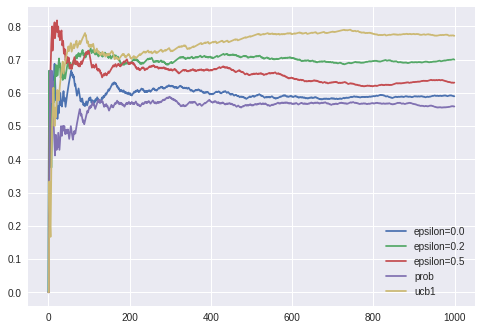

In [102]:
epsilon=0.0


expect_reward1=[]
expect_reward2=[]
expect_reward3=[]
expect_reward4=[]
expect_reward5=[]
expect_reward6=[]
N=1000

history=[]
total_reward=0
epsilon=0.0
for i in range(N):
  action=agent1(history,epsilon)
  r=multi_armed_bandit(int(action))
  history.append((action,r,i))
  total_reward+=r
  expect_reward1.append(total_reward/(i+1))

history=[]
total_reward=0
epsilon=0.2
for i in range(N):
  action=agent1(history,epsilon)
  r=multi_armed_bandit(int(action))
  history.append((action,r,i))
  total_reward+=r
  expect_reward2.append(total_reward/(i+1))

history=[]
total_reward=0
epsilon=0.5
for i in range(N):
  action=agent1(history,epsilon)
  r=multi_armed_bandit(int(action))
  history.append((action,r,i))
  total_reward+=r
  expect_reward3.append(total_reward/(i+1))

history=[]
total_reward=0
for i in range(N): 
  action=agent2(history)
  r=multi_armed_bandit(int(action))
  history.append((action,r,i))
  total_reward+=r
  expect_reward4.append(total_reward/(i+1))

history=[]
total_reward=0
for i in range(N): 
  action=agent3(history)
  r=multi_armed_bandit(int(action))
  history.append((action,r,i))
  total_reward+=r
  expect_reward5.append(total_reward/(i+1))

  
  
import matplotlib.pyplot as plt
plt.plot(expect_reward1,label="epsilon=0.0")
plt.plot(expect_reward2,label="epsilon=0.2")
plt.plot(expect_reward3,label="epsilon=0.5")
plt.plot(expect_reward4,label="prob")
plt.plot(expect_reward5,label="ucb1")

plt.legend()